In [31]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker

In [11]:


apiKey = ""
APIReadAccessToken = ""

response = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  apiKey + '&primary_release_year=2017&sort_by=revenue.desc')
highest_revenue = response.json()
highest_revenue_films = highest_revenue['results']
highest_revenue_films

[{'adult': False,
  'backdrop_path': '/5Iw7zQTHVRBOYpA0V6z0yypOPZh.jpg',
  'genre_ids': [12, 28, 878],
  'id': 181808,
  'original_language': 'en',
  'original_title': 'Star Wars: The Last Jedi',
  'overview': 'Rey develops her newly discovered abilities with the guidance of Luke Skywalker, who is unsettled by the strength of her powers. Meanwhile, the Resistance prepares to do battle with the First Order.',
  'popularity': 70.295,
  'poster_path': '/ySaaKHOLAQU5HoZqWmzDIj1VvZ1.jpg',
  'release_date': '2017-12-13',
  'title': 'Star Wars: The Last Jedi',
  'video': False,
  'vote_average': 6.786,
  'vote_count': 15391},
 {'adult': False,
  'backdrop_path': '/uU1Mt4JWhDvl4vKb3AfxNsorkoM.jpg',
  'genre_ids': [10751, 14, 10749],
  'id': 321612,
  'original_language': 'en',
  'original_title': 'Beauty and the Beast',
  'overview': "A live-action adaptation of Disney's version of the classic tale of a cursed prince and a beautiful young woman who helps him break the spell.",
  'popularity': 

In [13]:
df = pd.pandas.DataFrame(columns=['Film','Revenue'])
for film in highest_revenue_films:
    print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ apiKey+'&language=en-US')
    film_revenue = film_revenue.json()
    #print(locale.currency(film_revenue['revenue'], grouping=True ))
    df.loc[len(df)]=[film['title'],film_revenue['revenue']]

Star Wars: The Last Jedi
Beauty and the Beast
The Fate of the Furious
Despicable Me 3
Jumanji: Welcome to the Jungle
Spider-Man: Homecoming
Wolf Warrior 2
Guardians of the Galaxy Vol. 2
Thor: Ragnarok
Wonder Woman
Coco
Pirates of the Caribbean: Dead Men Tell No Tales
It
Justice League
Logan
Transformers: The Last Knight
Kong: Skull Island
The Boss Baby
Dunkirk
War for the Planet of the Apes


In [23]:
df.head

<bound method NDFrame.head of                                                 Film     Revenue
0                           Star Wars: The Last Jedi  1332698830
1                               Beauty and the Beast  1266115964
2                            The Fate of the Furious  1236000000
3                                    Despicable Me 3  1034800131
4                     Jumanji: Welcome to the Jungle   995339117
5                             Spider-Man: Homecoming   880166924
6                                     Wolf Warrior 2   870322670
7                     Guardians of the Galaxy Vol. 2   863756051
8                                     Thor: Ragnarok   855301806
9                                       Wonder Woman   823970682
10                                              Coco   807816196
11  Pirates of the Caribbean: Dead Men Tell No Tales   795900000
12                                                It   703000000
13                                    Justice League   66132

<function matplotlib.pyplot.show(close=None, block=None)>

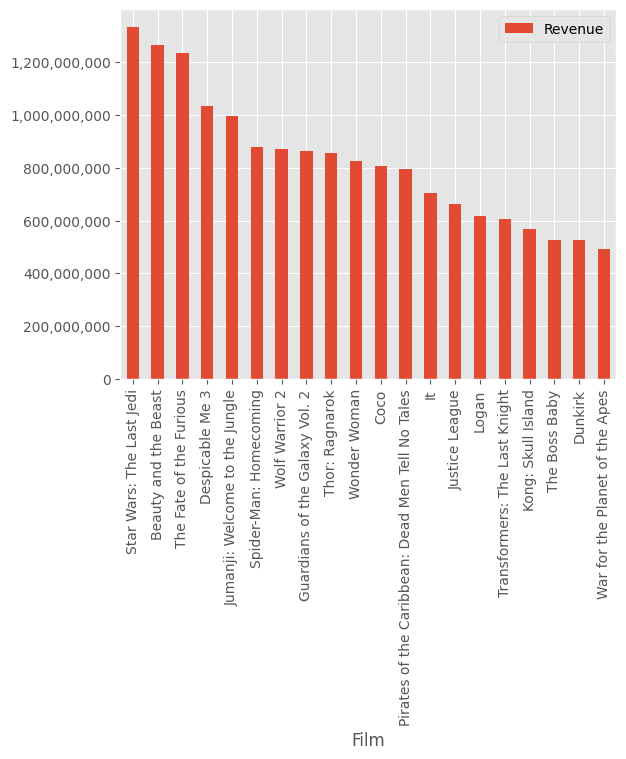

In [32]:
matplotlib.style.use('ggplot')
ax = df.plot(x="Film",y="Revenue",kind="bar")
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.show